# STEP 1: Importing libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Setting the path for the datasets
path = r'C:\\Users\\cpaul\\Documents\\Career Foundry\\Instacart Basket Analysis'

# Import prepared Instacart data (orders_products_merged_aggregated)
df_instacart_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_customers_merged.pkl'))

# STEP 2: Exercise steps

In [5]:
# Checking the frequency of "orders_day_of_week" column

df_instacart_customers_merged['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

Text(0, 0.5, 'Count of orders')

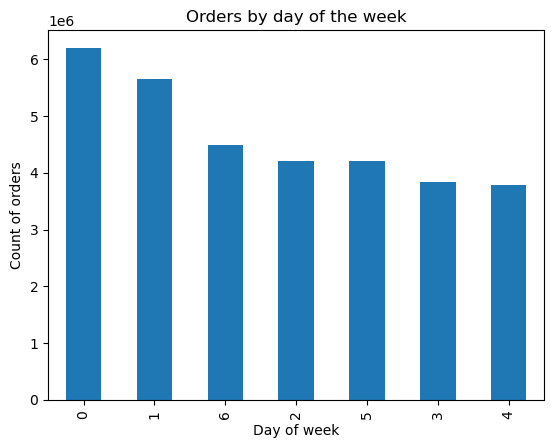

In [9]:
# Creating Bar Chart for "orders_day_of_week" column
dow_bar = df_instacart_customers_merged['orders_day_of_week'].value_counts().plot.bar(title="Orders by day of the week")
dow_bar.set_xlabel("Day of week")
dow_bar.set_ylabel("Count of orders")
#dow_bar.set(xlabel='Day of week', ylabel='Count of orders')



In [10]:
# 1e6 in the top of the y-axis means each of the y-axis value is times 10^6

# Exporting bar chart to an image file
dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

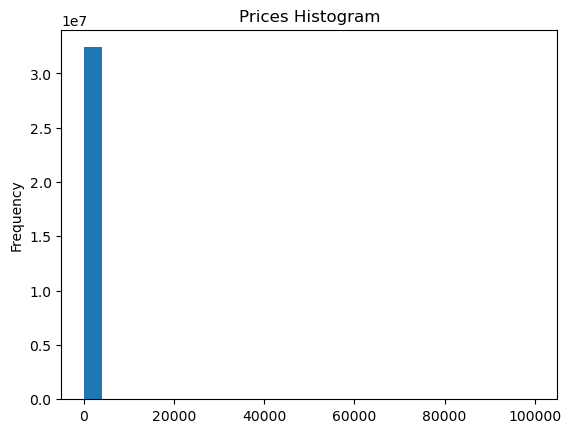

In [11]:
#Creating Histogram on 'prices' column

prices_hist = df_instacart_customers_merged['prices'].plot.hist(bins = 25, title = 'Prices Histogram')

In [12]:
# Checking the prices column since we are seeing only one bar instead of 25 bars like we set in the bins arguement.

df_instacart_customers_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
# the max column is too high witha value of 99999. so, checking specific statistics

df_instacart_customers_merged['prices'].mean()

11.980225638383438

In [17]:
df_instacart_customers_merged['prices'].median()

7.4

In [18]:
df_instacart_customers_merged['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

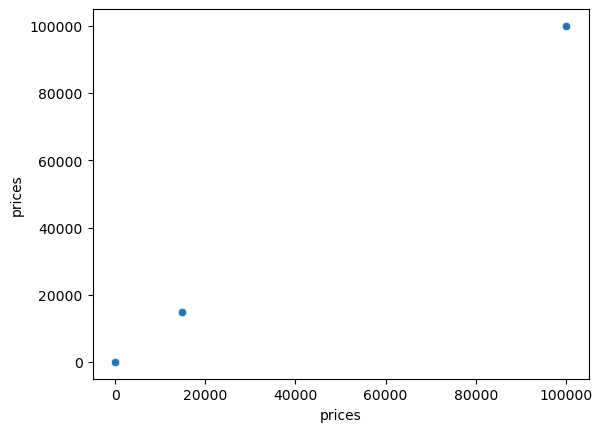

In [21]:
# Use scatterplot for exploratoty analysis to understand the distribution of data

sns.scatterplot(x = 'prices', y = 'prices',data = df_instacart_customers_merged)


In [25]:
# The mean of the prices column is around $12 but there is a value showing around $20000 and another around $100000.

# Check whether there are any values above a certain threshold value, assuming that the maximum price of an order could be $100
# Also can calculate the outliers and choose the threshold price as the mild outlier(minimum) from the list of outliers.

df_instacart_customers_merged.loc[df_instacart_customers_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_previous_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [26]:
# Assuming that the maximum price of an order could be $100 and then mark the prices for these 5127 rows as missing. 
# Also can calculate the outliers and choose the price as the mild outlier from the list of outliers and assigning values to the prices over and under the mild outliers on the upper and lower range respectively.

df_instacart_customers_merged.loc[df_instacart_customers_merged['prices'] >100, 'prices'] = np.nan

In [27]:
df_instacart_customers_merged['prices'].max()

25.0

In [ ]:
# $25 grocery item is much more likely. Now check the histogram again.

[Text(0.5, 0, 'prices')]

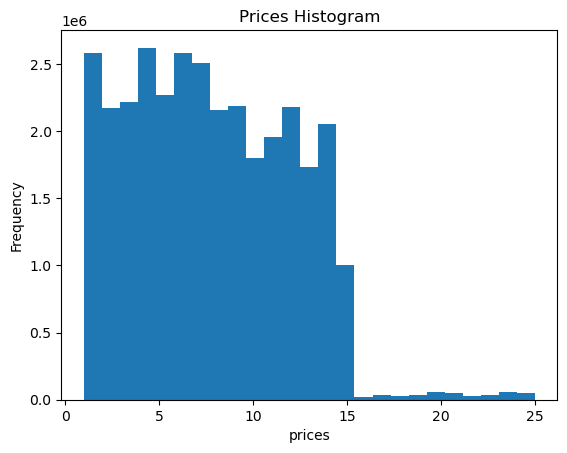

In [28]:
prices_hist = df_instacart_customers_merged['prices'].plot.hist(bins = 25, title = 'Prices Histogram')
prices_hist.set(xlabel='prices')

[Text(0.5, 0, 'prices')]

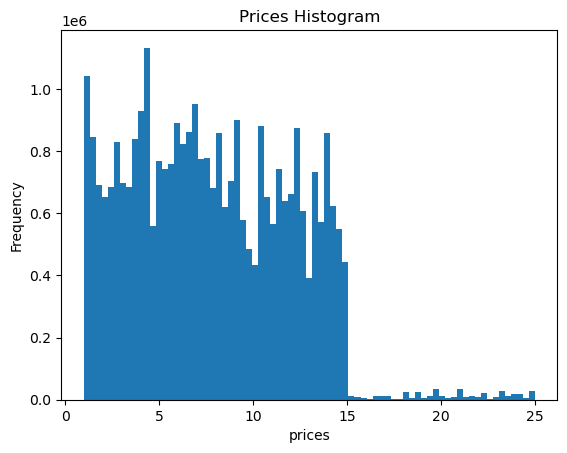

In [29]:
# Increase level of granularity by increasing the bins to 75.
prices_hist_2 = df_instacart_customers_merged['prices'].plot.hist(bins = 75, title = 'Prices Histogram')
prices_hist_2.set(xlabel='prices')

In [30]:
# There are a few orders over $15, looks good
# Now export the histogram to an image file
prices_hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_orders_prices.png'))

In [31]:
# Creating line charts by sampling data randomly and assigning value between 0 and 1 for every observation, since our dataset is very large
# we are doing  70/30 split and saving the True/False value based on test value <=0.7

np.random.seed(4)
dev = np.random.rand(len(df_instacart_customers_merged)) <= 0.7


In [32]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [33]:
# Split the data into two samples by using the list

# Store 70% of the sample in dataframe big
big = df_instacart_customers_merged[dev]

# Store 30% of the sample in dataframe small
small = df_instacart_customers_merged[~dev]

In [34]:
# Check the length to make sure the sub setting was right

len(df_instacart_customers_merged)

32404859

In [35]:
len(big) + len(small)

32404859

In [ ]:
# The total number of observations match.

In [36]:
# Before generating line chart to check how prices differ between the different days of the week, create another dataframe with just those two columns from the small dataframe.

df_subset_line_chart = small[['orders_day_of_week','prices']]

In [37]:
df_subset_line_chart.head(20)

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
12,3,4.4
13,3,4.4
19,1,4.4
21,2,4.7
22,3,4.7


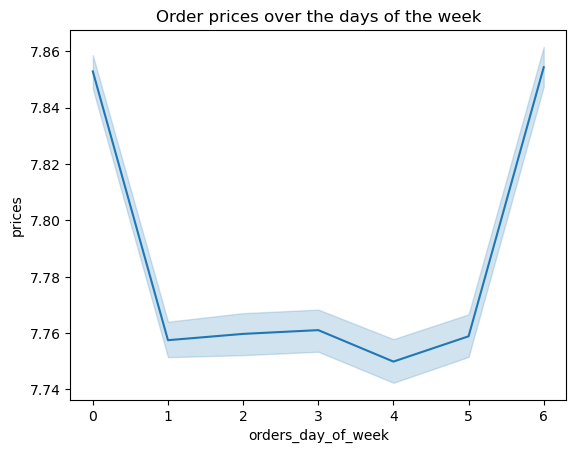

In [52]:
# Generate line chart using the seaborn library
line = sns.lineplot(data = df_subset_line_chart, x = 'orders_day_of_week',y = 'prices').set_title('Order prices over the days of the week')


In [ ]:
# There are more orders on day 0 and 6, Saturday and Sunday.

In [56]:
# Now export the line chart to an image file
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_orders_day_of_week_prices.png'))

# STEP 3: Histogram of order_hour_of_day column

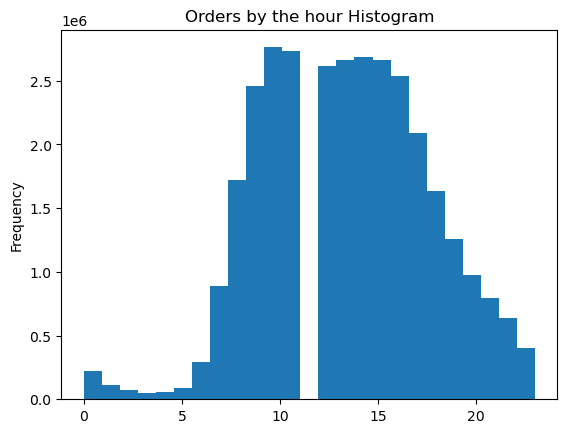

In [39]:
order_hour_of_day_hist = df_instacart_customers_merged['order_hour_of_day'].plot.hist(bins = 25, title = 'Orders by the hour Histogram')

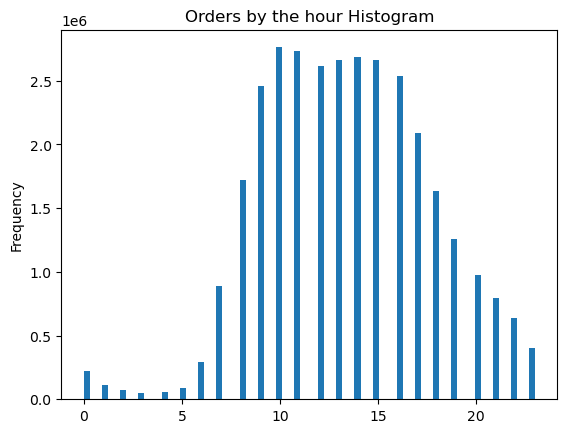

In [40]:
# Making the histogram more granular, increasing the bins
order_hour_of_day_hist = df_instacart_customers_merged['order_hour_of_day'].plot.hist(bins = 75, title = 'Orders by the hour Histogram')

# There are more orders made during the middle of the day compared to early mornings and late evenings. Most orders were made from hours 10 to 16.

In [45]:
# Now export the histogram to an image file
order_hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_of_day.png'))

# STEP 4: Distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [41]:
# Checking the frequency of "loyalty_flag" column

df_instacart_customers_merged['loyalty_flag'].value_counts()

Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: loyalty_flag, dtype: int64

[Text(0, 0.5, 'Count of orders')]

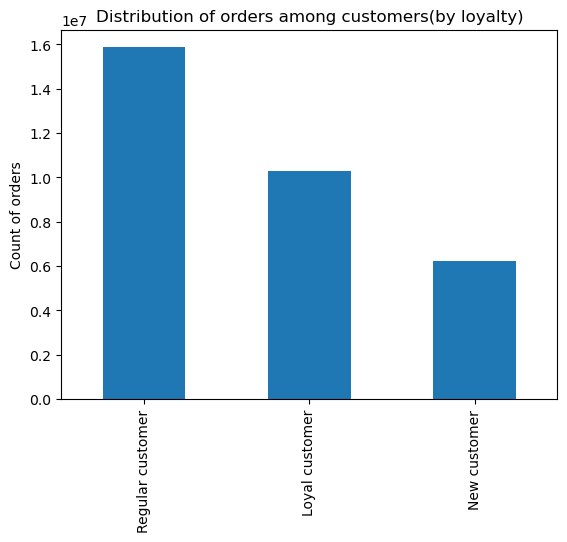

In [43]:
# Creating Bar Chart for "loyalty_flag" column
loyalty_bar = df_instacart_customers_merged['loyalty_flag'].value_counts().plot.bar(title="Distribution of orders among customers(by loyalty)")
loyalty_bar.set(ylabel='Count of orders')


In [46]:
# Now export the bar chart to an image file
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_customers_by_loyalty.png'))

# STEP 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)


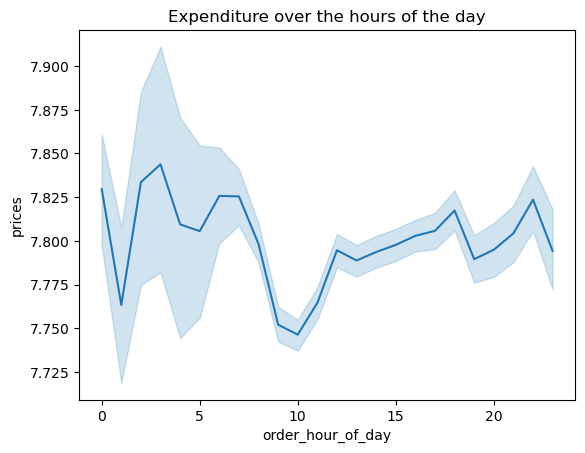

In [54]:
# Plot the line graph with 30% data that we subset already

# Before generating line chart to check how prices differ between the different hours of the day, create another dataframe with just those two columns from the small dataframe.
df_subset_line_chart_2 = small[['order_hour_of_day','prices']]

# Generate the line plot
line_plot_2 = sns.lineplot(data = df_subset_line_chart_2, x = 'order_hour_of_day',y = 'prices').set_title('Expenditure over the hours of the day')


# More expensive orders are made in the early morning hours, least expensive orders came in around hour 10 of the day and then increasing in the evening again before the price range drops at night.

In [57]:
# Now export the line chart to an image file
line_plot_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_order_hour_of_day_prices.png'))

# STEP 6: Exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:


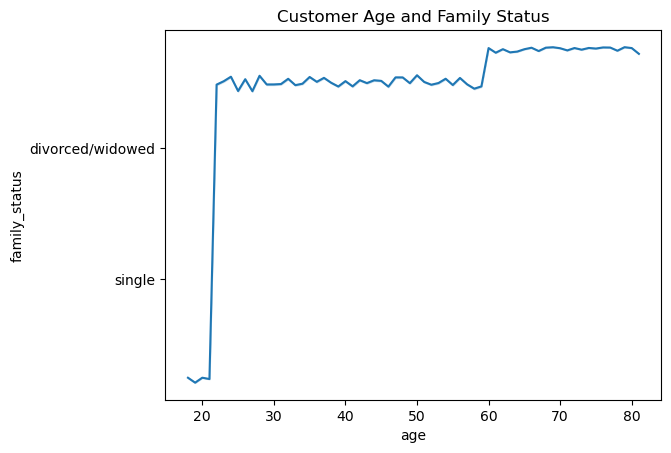

In [61]:
# Plot the line graph with 30% data that we subset already

# Before generating line chart to determine the connection between the age and family situation, create another dataframe with just those two columns from the small dataframe.
df_subset_line_chart_3 = small[['age','family_status']]

# Generate the line plot
line_plot_3 = sns.lineplot(data = df_subset_line_chart_3, x = 'age', y = 'family_status').set_title('Customer Age and Family Status')


In [50]:
df_subset_line_chart_3['family_status'].value_counts()

married                             6828141
single                              1597458
divorced/widowed                     830182
living with parents and siblings     465317
Name: family_status, dtype: int64

# Most of the customers are married.

In [62]:
# Now export the line chart to an image file
line_plot_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'linechart_age_family_status.png'))

# Explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

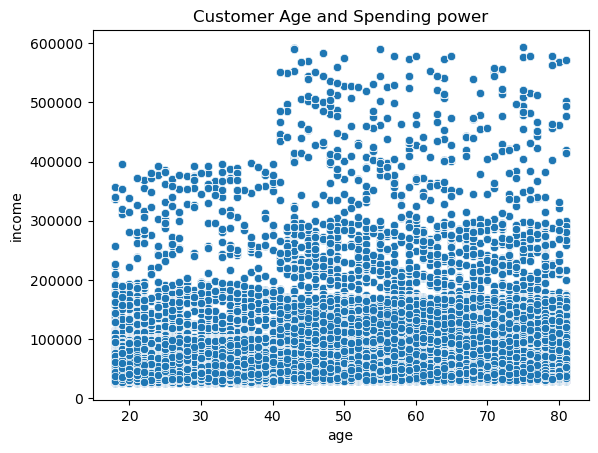

In [63]:
# Plot the line graph with 30% data that we subset already

# Before generating line chart to determine the connection between the age and income, create another dataframe with just those two columns from the small dataframe.
df_subset_scatterplot = small[['age','income']]

# Generate the scatter plot
scatter_plot = sns.scatterplot(data = df_subset_scatterplot, x = 'age', y = 'income',).set_title('Customer Age and Spending power')


# Many people above 40 years of age have mid and high income. Some people in this age group have very high income. Some people in the age group between 20 and 40 have mid income between 200000 to 400000. Overall, all ages have a minimum income around 200000.

In [64]:
# Now export the scatterplot to an image file
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))